In [2]:
import pandas as pd
import matplotlib.pyplot as plt
'''from pandas import json_normalize

import re
from textblob import TextBlob'''

'from pandas import json_normalize\n\nimport re\nfrom textblob import TextBlob'

In [64]:
df_steam_games = pd.read_csv('steam_games.csv')
df_steam_games

C:\Users\Heidi\AppData\Local\Temp\ipykernel_15232\3737949859.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_steam_games = pd.read_csv('steam_games.csv')


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",http://steamcommunity.com/app/773640/reviews/?...,"['Single-player', 'Steam Achievements']",1.99,False,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",http://steamcommunity.com/app/733530/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,733530.0,Sacada
120442,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",http://steamcommunity.com/app/658870/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,False,658870.0,"xropi,stev3ns"


In [18]:
df_user_reviews = pd.read_csv('user_reviews.csv')


In [4]:
df_user_items = pd.read_csv('user_items_2.csv')

# Análisis de sentimiento con NLP

 En el dataset user_reviews se incluyen reseñas de juegos hechos por distintos usuarios. Debes crear la columna 'sentiment_analysis' aplicando análisis de sentimiento con NLP con la siguiente escala: debe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo. Esta nueva columna debe reemplazar la de user_reviews.review para facilitar el trabajo 

Analizado en Colab y extraido como csv 

In [66]:
df_sentiment= pd.read_csv('user_review_sentiment.csv')

In [67]:
df_sentiment

,user_id,posted,item_id,helpful,recommend,polarity,sentiment
0,76561197970982479,"Posted November 5, 2011.",1250.0,No ratings yet,True,0.174444,2
1,76561197970982479,"Posted July 15, 2011.",22200.0,No ratings yet,True,0.337500,2
2,76561197970982479,"Posted April 21, 2011.",43110.0,No ratings yet,True,0.050000,2
3,js41637,"Posted June 24, 2014.",251610.0,15 of 20 people (75%) found this review helpful,True,0.114583,2
4,js41637,"Posted September 8, 2013.",227300.0,0 of 1 people (0%) found this review helpful,True,-0.036111,0
...,...,...,...,...,...,...,...
59300,76561198312638244,Posted July 10.,70.0,No ratings yet,True,0.233333,2
59301,76561198312638244,Posted July 8.,362890.0,No ratings yet,True,0.142500,2
59302,LydiaMorley,Posted July 3.,273110.0,1 of 2 people (50%) found this review helpful,True,0.087500,2
59303,LydiaMorley,Posted July 20.,730.0,No ratings yet,True,1.000000,2



# Función número 1



1. **PlayTimeGenre(genero)**:
- DataFrame a utilizar: `steam_games`
- Utiliza la columna `genres` para identificar los juegos del género proporcionado (`genero`).
- Utiliza la columna `release_date` para obtener los años de lanzamiento.
- Utiliza la columna `playtime_forever` del DataFrame `user_items` para obtener las horas jugadas por juego.
Ejemplo de retorno: {"Año de lanzamiento con más horas jugadas para Género X" : 2013}

In [68]:
df_user_items = pd.read_csv('user_items.csv')
df_user_itc    ems

,item_id,item_name,playtime_forever,playtime_2weeks
0,10,Counter-Strike,6,0
1,20,Team Fortress Classic,0,0
2,30,Day of Defeat,7,0
3,40,Deathmatch Classic,0,0
4,50,Half-Life: Opposing Force,0,0
...,...,...,...,...
5153204,346330,BrainBread 2,0,0
5153205,373330,All Is Dust,0,0
5153206,388490,One Way To Die: Steam Edition,3,3
5153207,521570,You Have 10 Seconds 2,4,4


In [69]:
# Primero, filtra el DataFrame 'steam_games' para obtener solo las columnas 'genres' y 'release_date', id y app_name.
# Estas son las columnas Genero del juego (ej: Action), el nombre del juego, el id del juego y el año de lanzamiento
df_genres_release_date = df_steam_games[['id','app_name','genres', 'release_date']]

#analizo como estan los datos
df_genres_release_date.info(0)
#Obtengo que id es del tipo decimal flotante y el resto del tipo objeto.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32133 non-null  float64
 1   app_name      32133 non-null  object 
 2   genres        28852 non-null  object 
 3   release_date  30068 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.7+ MB


In [70]:

#borro los registros nulos
df_genres_release_date = df_genres_release_date.dropna()

In [71]:
#borro los registros duplicados
df_genres_release_date = df_genres_release_date.drop_duplicates()

EDA

In [72]:
#analizo como estan los datos
df_genres_release_date.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 28831 entries, 88310 to 120443
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            28831 non-null  float64
 1   app_name      28831 non-null  object 
 2   genres        28831 non-null  object 
 3   release_date  28831 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [73]:
descripcion = df_genres_release_date['genres'].describe()
descripcion

count          28831
unique           882
top       ['Action']
freq            1877
Name: genres, dtype: object

In [74]:
# Valores únicos en las columnas
unique_values_genres = df_genres_release_date['genres'].unique()
unique_values_release_date = df_genres_release_date['release_date'].unique()
unique_values_app_name = df_genres_release_date['app_name'].unique()
unique_values_id = df_genres_release_date['id'].unique()


In [ ]:
# Visualizar la descripción y los valores únicos
print("Descripción del DataFrame:")
print(descripcion)
print("\nValores únicos en la columna 'genres':")
print(unique_values_genres)
print("\nValores únicos en la columna 'release_date':")
print(unique_values_release_date)
print("\nValores únicos en la columna 'app_name':")
print(unique_values_app_name)
print("\nValores únicos en la columna 'id':")
print(unique_values_id)

Con esta información, debo por un lado convertir la columna release_date(año de lanzamiento), en una fecha de año.
Por otro lado la de genres (género), las debo desanidar.

Preparo la columna de fecha para obtener el año 

In [76]:

# Convierte la columna 'release_date' a objetos de fecha con el formato 'YYYY-MM-DD'
df_genres_release_date['release_date'] = pd.to_datetime(df_genres_release_date['release_date'], format='%Y-%m-%d', errors='coerce')

# Extrae el año y crea una nueva columna 'release_year'
df_genres_release_date['release_year'] = df_genres_release_date['release_date'].dt.year

df_genres_release_date['release_year'] 

88310     2018.0
88311     2018.0
88312     2017.0
88313     2017.0
88315     2018.0
           ...  
120439    2018.0
120440    2018.0
120441    2018.0
120442    2018.0
120443    2017.0
Name: release_year, Length: 28831, dtype: float64

In [79]:
# Analizando, obtengo 28546 registros de género.
unique_values_release_year = df_genres_release_date['release_year'].unique()
print(unique_values_release_year)
print(df_genres_release_date['release_year'].info())

[2018. 2017. 1997. 1998. 2016. 2006. 2005. 2003. 2007. 2002. 2000. 1995.
 1996. 1994. 2001. 1993. 2004. 1999. 2008. 2009. 1992. 1989. 2010. 2011.
 2013. 2012. 2014. 1983. 1984. 2015. 1990. 1988. 1991. 1987. 1986. 2021.
 2019. 1985.]
<class 'pandas.core.series.Series'>
Index: 28546 entries, 88310 to 120443
Series name: release_year
Non-Null Count  Dtype  
--------------  -----  
28546 non-null  float64
dtypes: float64(1)
memory usage: 446.0 KB
None


In [80]:
#Confirmo que tenga la nueva columna release_year
df_genres_release_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28546 entries, 88310 to 120443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            28546 non-null  float64       
 1   app_name      28546 non-null  object        
 2   genres        28546 non-null  object        
 3   release_date  28546 non-null  datetime64[ns]
 4   release_year  28546 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.3+ MB


In [81]:
# Elimino la columna 'release_date' del DataFrame
df_genres_release_date = df_genres_release_date.drop('release_date', axis=1)


In [82]:
df_genres_release_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28546 entries, 88310 to 120443
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            28546 non-null  float64
 1   app_name      28546 non-null  object 
 2   genres        28546 non-null  object 
 3   release_year  28546 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.1+ MB


Preparo la columna de genero 

In [89]:
# Desanidar la columna 'genres' y crear una nueva columna 'genre'
df_genres_release_date['genre'] = df_genres_release_date['genres'].apply(lambda x: x.strip("[]").replace("'", "").split(', '))

# Explotar la columna 'genre' en múltiples filas
df_genres_release_date = df_genres_release_date.explode('genre')


In [90]:
df_genres_release_date['genre']

88310         Action
88310         Casual
88310          Indie
88310     Simulation
88310       Strategy
             ...    
120443         Indie
120443        Casual
120443         Indie
120443        Casual
120443         Indie
Name: genre, Length: 811543, dtype: object

In [92]:
#Vista de la tabla desanidada, confirmo que se creo la nueva columna genre antes de borrar la vieja genres anidada
df_genres_release_date

,id,app_name,genres,release_year,genre
88310,761140.0,Lost Summoner Kitty,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",2018.0,Action
88310,761140.0,Lost Summoner Kitty,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",2018.0,Casual
88310,761140.0,Lost Summoner Kitty,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",2018.0,Indie
88310,761140.0,Lost Summoner Kitty,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",2018.0,Simulation
88310,761140.0,Lost Summoner Kitty,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",2018.0,Strategy
...,...,...,...,...,...
120443,658870.0,EXIT 2 - Directions,"['Casual', 'Indie']",2017.0,Indie
120443,658870.0,EXIT 2 - Directions,"['Casual', 'Indie']",2017.0,Casual
120443,658870.0,EXIT 2 - Directions,"['Casual', 'Indie']",2017.0,Indie
120443,658870.0,EXIT 2 - Directions,"['Casual', 'Indie']",2017.0,Casual


In [94]:
df_genres_release_date = df_genres_release_date.drop('genres',axis=1)


KeyError: "['genres'] not found in axis"

In [150]:
df_genres_release_date

,id,app_name,release_year,genre
88310,761140.0,Lost Summoner Kitty,2018.0,Action
88310,761140.0,Lost Summoner Kitty,2018.0,Casual
88310,761140.0,Lost Summoner Kitty,2018.0,Indie
88310,761140.0,Lost Summoner Kitty,2018.0,Simulation
88310,761140.0,Lost Summoner Kitty,2018.0,Strategy
...,...,...,...,...
120443,658870.0,EXIT 2 - Directions,2017.0,Indie
120443,658870.0,EXIT 2 - Directions,2017.0,Casual
120443,658870.0,EXIT 2 - Directions,2017.0,Indie
120443,658870.0,EXIT 2 - Directions,2017.0,Casual


Ahora debo preparar la tabla de items, para obtener las horas jugadas por juego del Items



item_id, id del juego
item_name nombre del juego
playtime_forever, la cantidad de minutos jugados para cada juego 
playtime_2weeks, esta columna no tiene casi valores 
user_id para la funcion 1 no es necesaria pero la elimino al final 

In [136]:

df_user_items   


,item_id,item_name,playtime_forever,playtime_2weeks,user_id
0,10,Counter-Strike,6,0,76561197970982479
2,30,Day of Defeat,7,0,76561197970982479
8,300,Day of Defeat: Source,4733,0,76561197970982479
9,240,Counter-Strike: Source,1853,0,76561197970982479
10,3830,Psychonauts,333,0,76561197970982479
...,...,...,...,...,...
5153202,304930,Unturned,677,677,76561198329548331
5153203,227940,Heroes & Generals,43,43,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331


In [5]:
df_user_items_1 = df_user_items.drop(['playtime_2weeks'], axis=1)

In [6]:
df_user_items_1

,item_id,item_name,playtime_forever,user_id
0,10,Counter-Strike,6,76561197970982479
1,20,Team Fortress Classic,0,76561197970982479
2,30,Day of Defeat,7,76561197970982479
3,40,Deathmatch Classic,0,76561197970982479
4,50,Half-Life: Opposing Force,0,76561197970982479
...,...,...,...,...
5153204,346330,BrainBread 2,0,76561198329548331
5153205,373330,All Is Dust,0,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3,76561198329548331
5153207,521570,You Have 10 Seconds 2,4,76561198329548331


In [7]:
#elimino nulos
df_user_items_1.dropna()

,item_id,item_name,playtime_forever,user_id
0,10,Counter-Strike,6,76561197970982479
1,20,Team Fortress Classic,0,76561197970982479
2,30,Day of Defeat,7,76561197970982479
3,40,Deathmatch Classic,0,76561197970982479
4,50,Half-Life: Opposing Force,0,76561197970982479
...,...,...,...,...
5153204,346330,BrainBread 2,0,76561198329548331
5153205,373330,All Is Dust,0,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3,76561198329548331
5153207,521570,You Have 10 Seconds 2,4,76561198329548331


In [140]:

playtime_stats = df_user_items_1['playtime_forever'].describe()
print(playtime_stats)


count    3.285246e+06
mean     1.555251e+03
std      6.721032e+03
min      1.000000e+00
25%      4.400000e+01
50%      2.050000e+02
75%      8.080000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64


In [8]:
#Elimino los registros que tienen cero tiempo jugado
df_user_items_1= df_user_items_1[df_user_items['playtime_forever'] != 0]

In [142]:

playtime_stats = df_user_items_1['playtime_forever'].describe()
print(playtime_stats)


count    3.285246e+06
mean     1.555251e+03
std      6.721032e+03
min      1.000000e+00
25%      4.400000e+01
50%      2.050000e+02
75%      8.080000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64


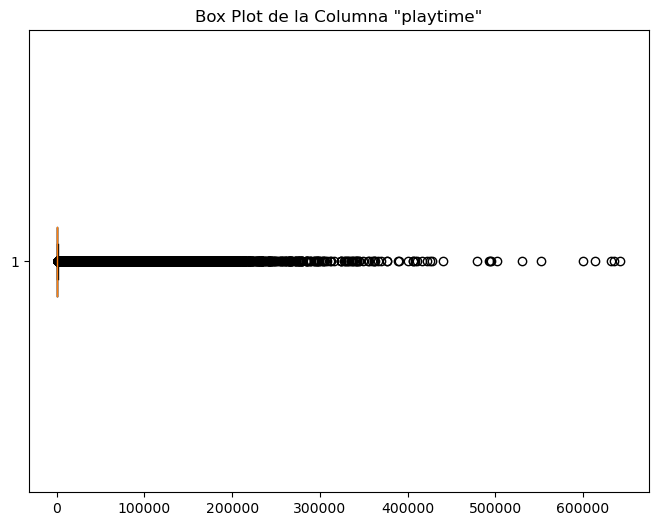

In [143]:

plt.figure(figsize=(8, 6))
plt.boxplot(df_user_items_1['playtime_forever'], vert=False)
plt.title('Box Plot de la Columna "playtime"')
plt.show()


In [144]:
q1 = df_user_items_1['playtime_forever'].quantile(0.25)
q3 = df_user_items_1['playtime_forever'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_user_items_1[(df_user_items['playtime_forever'] < lower_bound) | (df_user_items_1['playtime_forever'] > upper_bound)]
outliers

#segun esta tabla existen 773.155 de un total de 5.153.209
#sin embargo en este trabajo no se eliminaran.

,item_id,item_name,playtime_forever,user_id
8,300,Day of Defeat: Source,4733,76561197970982479
16,6910,Deus Ex: Game of the Year Edition,2685,76561197970982479
46,1250,Killing Floor,10006,76561197970982479
48,3590,Plants vs. Zombies: Game of the Year,4413,76561197970982479
65,8980,Borderlands,3061,76561197970982479
...,...,...,...,...
5152618,500,Left 4 Dead,3172,76561198312638244
5152638,362890,Black Mesa,2184,76561198312638244
5152651,730,Counter-Strike: Global Offensive,2317,76561198313357718
5152652,730,Counter-Strike: Global Offensive,2987,POMFP0MF


In [145]:
top_outliers = outliers.sort_values(by='playtime_forever', ascending=False)
top_outliers.head(10)

,item_id,item_name,playtime_forever,user_id
587715,4000,Garry's Mod,642773,wolop
2499068,212200,Mabinogi,635295,Evilutional
4075729,42710,Call of Duty: Black Ops - Multiplayer,632452,76561198019826668
1495340,4000,Garry's Mod,613411,76561198039832932
1836985,72200,Universe Sandbox,600068,tsunamitad
236899,4000,Garry's Mod,551719,jimmynoe
1928125,8500,EVE Online,530882,shinomegami
2905355,4000,Garry's Mod,501498,lildoughnut
3212940,4000,Garry's Mod,495058,ThisIsWhereIGetOff
1026264,320,Half-Life 2: Deathmatch,493791,76561197977470391


In [146]:
#Agrupo por item_id y sumo playtime_forever para cada juego
df_minutos_totales_por_juego = df_user_items_1.groupby(['item_id'])['playtime_forever'].sum()

In [147]:
df_minutos_totales_por_juego

item_id
10        17386015
20          961702
30          758991
40          154486
50          734562
            ...   
527570           2
527810           2
527890           1
527900          44
528660         182
Name: playtime_forever, Length: 10050, dtype: int64

Uno el dataframe de minutos_totales_por_juego con el de genero y año de lanzamiento a través de su id.  

In [151]:
# Utiliza la función merge para unir los DataFrames por las columnas "item_id" y "id"
df_tiempo_juego_con_genero_y_lanzamiento = df_genres_release_date.merge(df_minutos_totales_por_juego, left_on='id', right_on='item_id', how='inner')

In [152]:

# Muestro la tabla ordenando por el ano de lanzamiento
df_tiempo_juego_con_genero_y_lanzamiento = df_tiempo_juego_con_genero_y_lanzamiento.sort_values(by='release_year', ascending=True)
df_tiempo_juego_con_genero_y_lanzamiento


,id,app_name,release_year,genre,playtime_forever
7504,227380.0,Dragon's Lair,1983.0,Casual,3582
7515,227380.0,Dragon's Lair,1983.0,Adventure,3582
7514,227380.0,Dragon's Lair,1983.0,Action,3582
7513,227380.0,Dragon's Lair,1983.0,Casual,3582
7512,227380.0,Dragon's Lair,1983.0,Adventure,3582
...,...,...,...,...,...
151956,302810.0,Divinia Chronicles: Relics of Gan-Ti,2018.0,Early Access,21
151955,302810.0,Divinia Chronicles: Relics of Gan-Ti,2018.0,RPG,21
151954,302810.0,Divinia Chronicles: Relics of Gan-Ti,2018.0,Indie,21
151952,302810.0,Divinia Chronicles: Relics of Gan-Ti,2018.0,Action,21


In [154]:
df_tiempo_juego_con_genero_y_lanzamiento['release_year'].dtype

dtype('float64')

In [155]:
#convierto el año en un número entero
df_tiempo_juego_con_genero_y_lanzamiento['release_year'] = df_tiempo_juego_con_genero_y_lanzamiento['release_year'].astype(int)


In [156]:
df_tiempo_juego_con_genero_y_lanzamiento = df_tiempo_juego_con_genero_y_lanzamiento.drop('app_name', axis=1)

In [158]:
df_tiempo_juego_con_genero_y_lanzamiento

,id,release_year,genre,playtime_forever
7504,227380.0,1983,Casual,3582
7515,227380.0,1983,Adventure,3582
7514,227380.0,1983,Action,3582
7513,227380.0,1983,Casual,3582
7512,227380.0,1983,Adventure,3582
...,...,...,...,...
151956,302810.0,2018,Early Access,21
151955,302810.0,2018,RPG,21
151954,302810.0,2018,Indie,21
151952,302810.0,2018,Action,21


In [159]:
# Primero, agrupa los datos por género y año, y suma las horas jugadas
grouped = df_tiempo_juego_con_genero_y_lanzamiento.groupby(['genre', 'release_year'])['playtime_forever'].sum().reset_index()

# Luego, para cada género, encuentra el año con más horas jugadas
df_filtrado_genero_anio = grouped.loc[grouped.groupby('genre')['playtime_forever'].idxmax()]

# Para mostrar el DataFrame final
print(df_filtrado_genero_anio)


                         genre  release_year  playtime_forever
27                      Action          2013        5417057600
59                   Adventure          2011        3525706779
71    Animation &amp; Modeling          2015          11974521
75            Audio Production          2014           6671903
104                     Casual          2015        2686534939
112  Design &amp; Illustration          2015          12906521
116               Early Access          2013        3556873110
124                  Education          2013           7309287
143               Free to Play          2015        3067034050
165                      Indie          2013        4086085319
178      Massively Multiplayer          2013        3787660758
188              Photo Editing          2016            620916
207                        RPG          2011        3747198196
234                     Racing          2015         603191553
265                 Simulation          2015        226

In [160]:

df_filtrado_genero_anio.to_csv('Funcion_1.csv', index=False)

In [161]:
def PlayTimeGenre(genero: str):
    df = pd.read_csv('Funcion_1.csv')
    # Filtrar el DataFrame para el género específico
    genero_df = df[df['genre'] == genero]

    if genero_df.empty:
        return {"No se encontraron datos para el género": genero}

    # Encontrar el año con más horas jugadas para el género
    max_year = genero_df.loc[genero_df['playtime_forever'].idxmax()]['release_year']

    return {"Año de lanzamiento con más horas jugadas para " + genero: int(max_year)}



In [ ]:
'''import pandas as pd
from fastapi import FastAPI
import uvicorn 

app = FastAPI()

play_genre = pd.read_csv('Funcion_1.csv', low_memory=False)

@app.get("/release_year/{genre}", name='año con mas horas jugadas para el género ingresado')

def PlayTimeGenre(genre: str):
   
    genero_df = play_genre[play_genre['genre'] == genre]

    if genero_df.empty:
        return {"No se encontraron datos para el género": genre}

    
    max_year = genero_df.loc[genero_df['playtime_forever'].idxmax()]['release_year']

    return {"Año de lanzamiento con más horas jugadas para " + genre: int(max_year)}'''

In [163]:
# Ejemplo de uso
genero = 'Adventure'
resultado = PlayTimeGenre(genero)
print(resultado)

{'Año de lanzamiento con más horas jugadas para Adventure': 2011}


# 2. **UserForGenre(genero)**:


- DataFrame a utilizar: `user_items`
- Utiliza la columna `items` para identificar los juegos del género proporcionado (`genero`).
- Utiliza la columna `user_id` para obtener el usuario que acumula más horas jugadas.
- Utiliza la columna `playtime_forever` para obtener las horas jugadas por juego y usuario.
- Utiliza la columna `posted` del DataFrame `reviews` para obtener los años.

Ejemplo de retorno: {"Usuario con más horas jugadas para Género X" : us213ndjss09sdf, "Horas jugadas":[{Año: 2013, Horas: 203}, {Año: 2012, Horas: 100}, {Año: 2011, Horas: 23}]}

Horas jugadas por usuario por juego del DataFrame de Items

In [9]:
#Comienzo con el df ya limpio de la función anterior
df_user_items_2 = df_user_items_1

In [10]:
df_user_items_2

,item_id,item_name,playtime_forever,user_id
0,10,Counter-Strike,6,76561197970982479
2,30,Day of Defeat,7,76561197970982479
8,300,Day of Defeat: Source,4733,76561197970982479
9,240,Counter-Strike: Source,1853,76561197970982479
10,3830,Psychonauts,333,76561197970982479
...,...,...,...,...
5153202,304930,Unturned,677,76561198329548331
5153203,227940,Heroes & Generals,43,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3,76561198329548331
5153207,521570,You Have 10 Seconds 2,4,76561198329548331


In [14]:
df_user_items_2 = df_user_items_2.drop('item_name', axis=1)

KeyError: "['item_name'] not found in axis"

In [15]:
df_user_items_2 = df_user_items_2.rename(columns={'item_id': 'id'})

In [16]:
df_user_items_2 = df_user_items_2.sort_values(by='id')
df_user_items_2

,id,playtime_forever,user_id
0,10,6,76561197970982479
4272167,10,1,76561198041248079
4004646,10,1186,BTR1
1680087,10,45,EPGPenguin
4117025,10,29,76561198025973830
...,...,...,...
3170997,527570,2,caseyshi247
2899885,527810,2,lexby
1905193,527890,1,SmokaBluntos
561214,527900,44,76561198159037032


In [17]:
df_genres_release_date

NameError: name 'df_genres_release_date' is not defined

In [179]:
df_genre= df_genres_release_date.drop(['app_name','release_year'], axis=1)
df_genre = df_genre.sort_values(by='id')
df_genre = df_genre.reset_index (drop=True)
df_genre

,id,genre
0,10.0,Action
1,20.0,Action
2,30.0,Action
3,40.0,Action
4,50.0,Action
...,...,...
811538,2028103.0,Adventure
811539,2028103.0,Adventure
811540,2028103.0,Action
811541,2028103.0,Action


In [190]:
#guardo df_genre en un csv
#y tambien el df_user_items_2

#df_genre.to_csv('df_genre')
#df_user_items_2.to_csv('df_user_items_2')

MemoryError: Unable to allocate 2.67 MiB for an array with shape (33333,) and data type <U21

In [4]:
df_genre_1 = pd.read_csv('df_genre.csv')
df_user_minutos = pd.read_csv ('df_user_items_2.csv')

Uno el dataframe de user_items y el de steam_games

In [5]:
merged_df = df_user_minutos.merge(df_genre_1, on="id", how="left")


In [8]:
merged_df

,Unnamed: 0_x,id,playtime_forever,user_id,Unnamed: 0_y,genre
0,0,10,6,76561197970982479,0.0,Action
1,4272167,10,1,76561198041248079,0.0,Action
2,4004646,10,1186,BTR1,0.0,Action
3,1680087,10,45,EPGPenguin,0.0,Action
4,4117025,10,29,76561198025973830,0.0,Action
...,...,...,...,...,...,...
3127205,2102279,33230,2331,yaegerthearcticwolf,4515.0,Action
3127206,2102279,33230,2331,yaegerthearcticwolf,4516.0,Adventure
3127207,2102279,33230,2331,yaegerthearcticwolf,4517.0,Action
3127208,2102279,33230,2331,yaegerthearcticwolf,4518.0,Adventure


In [12]:
merged_df.reset_index(drop=True, inplace=True)

In [58]:
merged_df = merged_df.drop('Unnamed: 0_x', axis=1)
merged_df = merged_df.drop('Unnamed: 0_y', axis=1)

In [59]:
merged_df

,id,playtime_forever,user_id,genre
0,10,6,76561197970982479,Action
1,10,1,76561198041248079,Action
2,10,1186,BTR1,Action
3,10,45,EPGPenguin,Action
4,10,29,76561198025973830,Action
...,...,...,...,...
3127205,33230,2331,yaegerthearcticwolf,Action
3127206,33230,2331,yaegerthearcticwolf,Adventure
3127207,33230,2331,yaegerthearcticwolf,Action
3127208,33230,2331,yaegerthearcticwolf,Adventure


In [60]:
#merged_df.to_csv('df_user_minutos_genero.csv')

Con df de reviews

In [27]:
#Calculo el año a traves de posted
df_user_reviews_2 = df_user_reviews[["user_id", "posted", "item_id"]]
df_user_reviews_2.head(20)


,user_id,posted,item_id
0,76561197970982479,"Posted November 5, 2011.",1250.0
1,76561197970982479,"Posted July 15, 2011.",22200.0
2,76561197970982479,"Posted April 21, 2011.",43110.0
3,js41637,"Posted June 24, 2014.",251610.0
4,js41637,"Posted September 8, 2013.",227300.0
5,js41637,"Posted November 29, 2013.",239030.0
6,evcentric,Posted February 3.,248820.0
7,evcentric,"Posted December 4, 2015.",370360.0
8,evcentric,"Posted November 3, 2014.",237930.0
9,evcentric,"Posted October 15, 2014.",263360.0


In [28]:



# Reemplaza 'df' con el nombre real de tu DataFrame y 'columna_texto' con el nombre de la columna que deseas modificar
df_user_reviews_2['posted'] = df_user_reviews_2['posted'].str.replace('Posted', '', case=False)


# Reemplaza 'df' con el nombre real de tu DataFrame y 'columna_texto' con el nombre de la columna que deseas modificar
palabras_a_eliminar = [    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"]

for palabra in palabras_a_eliminar:
    df_user_reviews_2['posted'] = df_user_reviews_2['posted'].str.replace(palabra, ' ', case=False)

df_user_reviews_2['posted'] = df_user_reviews_2['posted'].str.replace(',', '-', case=False)
df_user_reviews_2['posted'] = df_user_reviews_2['posted'].str.replace('.', '', case=False)

# Divide la columna 'posted' por el guion y selecciona la segunda parte
df_user_reviews_2['posted'] = df_user_reviews_2['posted'].str.split('-').str[1]

# Convierte la columna 'posted' a tipo numérico si es necesario
df_user_reviews_2['posted'] = pd.to_numeric(df_user_reviews_2['posted'], errors='coerce')




C:\Users\Heidi\AppData\Local\Temp\ipykernel_15088\1069312962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews_2['posted'] = df_user_reviews_2['posted'].str.replace('Posted', '', case=False)
C:\Users\Heidi\AppData\Local\Temp\ipykernel_15088\1069312962.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews_2['posted'] = df_user_reviews_2['posted'].str.replace(palabra, ' ', case=False)
C:\Users\Heidi\AppData\Local\Temp\ipykernel_15088\1069312962.py:22: SettingWithCopyWarning: 


In [35]:
df_user_reviews_2


,user_id,posted,item_id
0,76561197970982479,2011.0,1250.0
1,76561197970982479,2011.0,22200.0
2,76561197970982479,2011.0,43110.0
3,js41637,2014.0,251610.0
4,js41637,2013.0,227300.0
...,...,...,...
59328,76561198312638244,1.0,70.0
59329,76561198312638244,1.0,362890.0
59330,LydiaMorley,1.0,273110.0
59331,LydiaMorley,1.0,730.0


In [34]:
df_user_reviews_2['posted'].fillna(1, inplace=True)

C:\Users\Heidi\AppData\Local\Temp\ipykernel_15088\1321195174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews_2['posted'].fillna(1, inplace=True)


In [37]:
df_user_reviews_2['posted'] = df_user_reviews_2['posted'].astype(int)


C:\Users\Heidi\AppData\Local\Temp\ipykernel_15088\2345728331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews_2['posted'] = df_user_reviews_2['posted'].astype(int)


Uno la tabla de user_reviews con la ya unida user_items y steam_games

In [38]:
df_user_reviews_2

,user_id,posted,item_id
0,76561197970982479,2011,1250.0
1,76561197970982479,2011,22200.0
2,76561197970982479,2011,43110.0
3,js41637,2014,251610.0
4,js41637,2013,227300.0
...,...,...,...
59328,76561198312638244,1,70.0
59329,76561198312638244,1,362890.0
59330,LydiaMorley,1,273110.0
59331,LydiaMorley,1,730.0


In [41]:
df_user_reviews_2['id'] = df_user_reviews_2['item_id']

C:\Users\Heidi\AppData\Local\Temp\ipykernel_15088\1956313138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews_2['id'] = df_user_reviews_2['item_id']


In [44]:
df_user_reviews_2 = df_user_reviews_2.drop('item_id', axis=1)


KeyError: "['item_id'] not found in axis"

In [51]:
df_user_reviews_2 = df_user_reviews_2.sort_values(by='id')

In [49]:
valores_nulos_por_columna = df_user_reviews_2.isnull().sum()
valores_nulos_por_columna


user_id     0
posted      0
id         28
dtype: int64

In [52]:
df_user_reviews_2

,user_id,posted,id
43156,waspish,2012,10.0
7970,BestinTheWorldThund3r,2014,10.0
24145,76561198001699914,2013,10.0
57397,JunglisJust-M-tlifewithmegg,2015,10.0
35095,fuckingdinasaww,2014,10.0
...,...,...,...
50718,76561198063489150,1,NaN
53323,thecommunistbear,1,NaN
55425,76561198085883839,1,NaN
57578,76561198100396147,1,NaN


In [7]:
#df_user_reviews_2.to_csv('df_user_posted.csv')

NameError: name 'df_user_reviews_2' is not defined

In [ ]:
#df_user_posted.to_csv('df_user_posted.csv')

In [3]:
df_user_posted = pd.read_csv('df_user_posted.csv')

In [4]:
df_user_posted

,Unnamed: 0,user_id,posted,id
0,0,waspish,2012,10.0
1,1,BestinTheWorldThund3r,2014,10.0
2,2,76561198001699914,2013,10.0
3,3,JunglisJust-M-tlifewithmegg,2015,10.0
4,4,fuckingdinasaww,2014,10.0
...,...,...,...,...
59328,59328,76561198063489150,1,NaN
59329,59329,thecommunistbear,1,NaN
59330,59330,76561198085883839,1,NaN
59331,59331,76561198100396147,1,NaN


In [5]:
del df_user_posted['Unnamed: 0']

In [6]:
df_user_posted

,user_id,posted,id
0,waspish,2012,10.0
1,BestinTheWorldThund3r,2014,10.0
2,76561198001699914,2013,10.0
3,JunglisJust-M-tlifewithmegg,2015,10.0
4,fuckingdinasaww,2014,10.0
...,...,...,...
59328,76561198063489150,1,NaN
59329,thecommunistbear,1,NaN
59330,76561198085883839,1,NaN
59331,76561198100396147,1,NaN


In [10]:
df_user_posted.dropna()

,user_id,posted,id
0,waspish,2012,10.0
1,BestinTheWorldThund3r,2014,10.0
2,76561198001699914,2013,10.0
3,JunglisJust-M-tlifewithmegg,2015,10.0
4,fuckingdinasaww,2014,10.0
...,...,...,...
59300,76561198075141715,1,521430.0
59301,76561198071122396,1,521570.0
59302,TfhuAWGscvg,1,521570.0
59303,mikeyg74,1,521990.0


In [7]:
df_user_minutos_genero = pd.read_csv('df_user_minutos_genero.csv')

Junte las tablas de user, genero y tiempo jugado con la de user_reviews teniendo en cuenta la fecha de posted

Continúa en notebook merge_1